In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test  = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [65]:
# Train_test_split
X = train['text']
Y = train['target']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, shuffle = True, random_state = 1)
test_split = test['text']

# Extracting Features

In [66]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

# Building Model

In [67]:
class_weight = {
    0 : 1,
    1 : 2
}

In [68]:
model = svm.SVC(kernel = 'rbf',class_weight = class_weight)
model.fit(features, y_train)

SVC(class_weight={0: 1, 1: 2})

# Testing

In [69]:
features_test = cv.transform(x_test)
print(f'Accuracy : {round(model.score(features_test, y_test), 4)*100}%')

Accuracy : 79.25%


# Confusion Matrix and Classification Report


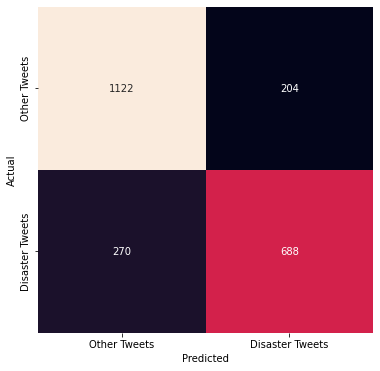

Classification Report ---------->
                  precision    recall  f1-score   support

   Other Tweets       0.81      0.85      0.83      1326
Disaster Tweets       0.77      0.72      0.74       958

       accuracy                           0.79      2284
      macro avg       0.79      0.78      0.78      2284
   weighted avg       0.79      0.79      0.79      2284



In [70]:
pred = model.predict(features_test)
cm = confusion_matrix(y_test, pred, labels = [0, 1])
clr = classification_report(y_test, pred, labels = [0, 1], target_names = ['Other Tweets', 'Disaster Tweets'] )
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Other Tweets', 'Disaster Tweets'])
plt.yticks(ticks = [0.5, 1.5], labels= ['Other Tweets', 'Disaster Tweets'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Classification Report ---------->\n', clr)

# Final Predictions

In [71]:
test_split = cv.transform(test_split)
final_pred = model.predict(test_split)

In [72]:
submission = test[['id']]
submission['target'] = final_pred
submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


# Submission

In [73]:
submission.to_csv('submission.csv', index=False)